**Name:** Karunakar Thammadi

**Week 2 Assignment**

**Date:** 9-05-2025

### Assignment for Week 2 - KNN

#### Exercise:

**Data Set:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease <br>
Notice, this is the same dataset that you worked with last week.  Feel free to use your cleaned up data file or you can use the one that I have posted in WorldClass. 

**Objective:** Predict heart disease in patients.

* Get to know your data, start out by data exploration. Summarized your finding.

* Divide the data into training set and test set randomly with ratio 80:20.  Make prediction based on 1-nearest neighbor. What is the error rate of this approach?  Report your results in a confusion matrix.

* Use different values for K, what is the optimal value of K from your experiments? Report the error rate of the optimal K value and its confusion matrix. Is there any improvement (by how much) over 1-nearest neighbor?

* Normalize and center your data to improve accuracy

* Balance your dataset (if applicable) using either SMOTE, NearMiss, ENN or some other balancing techniques.  Justify your balancing in a Markdown cell.
  
* Is there anything else you can do to improve your model? If yes, demonstrate your approach. (Hint: there is always something that you can try, unless your accuracy score is 100%)

* Summarize your best model and accuracy score at the end of your notebook.


### Deliverables:

Upload your notebook's .ipynb file (Also, if you decide to use your heart_disease data set, I'll need a copy of that too. I can't validate your notebook without your dtatset.)
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

### Importing libraries

Installation of required libraries to work with data and machine learning. Pandas are applied to tabular data and train using KNeighborsRegressor and traintestsplit of the sklearn library to regress to the nearest k-neighbors and divide the data. PCA is being imported to dimensionally reduce and seaborn and matplotlib are being used to generate complex and simple visualizations, and inline plotting is turned on in Jupyter notebooks.

In [2]:
# Importing pandas to handle data in tabular form
import pandas as pd

# Importing KNeighborsRegressor from sklearn to apply k-nearest neighbors regression
from sklearn.neighbors import KNeighborsRegressor
# Importing train_test_split from sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Importing PCA from sklearn to perform Principal Component Analysis
from sklearn.decomposition import PCA

# Importing seaborn for advanced data visualizations
import seaborn as sns
# Importing matplotlib for creating basic plots
import matplotlib.pyplot as plt
# Enabling inline plotting in Jupyter notebooks
%matplotlib inline
# Setting seaborn as the default style for the plots
sns.set()


In [3]:
# Importing warnings module to manage warning messages
import warnings
# Ignoring all warning messages to avoid cluttering the output
warnings.filterwarnings("ignore")


### 1. Get to know your data, start out by data exploration. Summarized your finding.

**Reading and Inspecting the Dataset**

Reading a dataset in the specified CSV file path with pandas readcsv function. The data is being loaded into a DataFrame named heartdisease. To view the dataset structure, and have a preview of the data, the head functional is used to display the first few rows of data in the dataset to get the contents and columns of the dataset.

In [8]:
# Reading the dataset from the specified CSV file path
heart_disease = pd.read_csv("C:/Users/KARUNAKAR/Downloads/Machine Learning/W1/heart.disease.data.csv")

# Displaying the first few rows of the dataset to inspect its structure
heart_disease.head()


,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,slope,num
0,29,1,2,130,204,2,6,0,1,0,2,202,0,3,1,0
1,34,1,1,118,182,20,6,0,-9,0,2,174,0,3,1,0
2,34,0,2,118,210,10,15,0,-9,1,0,192,0,3,1,0
3,35,0,4,138,183,0,0,0,-9,1,0,182,0,3,1,0
4,35,1,4,120,198,0,0,0,-9,0,0,130,1,7,2,1


Getting the structure of the dataset, as an info() function that gives information about column names, type of data, and the number of non-nulls in each column. This helps to understand the structure of the dataset and realize any potential issues with it like missing values. The describe() function is being used to generate the summarize of the numeric columns and give an idea of the distribution and range of the numeric data.


In [10]:
# getting dataset information like column names, data types, and non-null counts
heart_disease.info()

# showing summary statistics of numeric columns
heart_disease.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       282 non-null    int64
 1   sex       282 non-null    int64
 2   cp        282 non-null    int64
 3   trestbps  282 non-null    int64
 4   chol      282 non-null    int64
 5   cigs      282 non-null    int64
 6   years     282 non-null    int64
 7   fbs       282 non-null    int64
 8   dm        282 non-null    int64
 9   famhist   282 non-null    int64
 10  restecg   282 non-null    int64
 11  thalach   282 non-null    int64
 12  exang     282 non-null    int64
 13  thal      282 non-null    int64
 14  slope     282 non-null    int64
 15  num       282 non-null    int64
dtypes: int64(16)
memory usage: 35.4 KB


,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,slope,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,16.460993,14.829787,0.148936,-8.184397,0.620567,1.014184,149.765957,0.326241,4.581560,1.599291,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,19.580300,15.564563,0.356658,2.741802,0.486108,0.998118,22.923869,0.469670,2.248467,0.619148,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,-9.000000,-9.000000,0.000000,-9.000000,0.000000,0.000000,71.000000,0.000000,-9.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,133.250000,0.000000,3.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,10.000000,15.000000,0.000000,-9.000000,1.000000,2.000000,153.500000,0.000000,3.000000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,30.000000,30.000000,0.000000,-9.000000,1.000000,2.000000,165.750000,1.000000,7.000000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,99.000000,54.000000,1.000000,1.000000,1.000000,2.000000,202.000000,1.000000,7.000000,3.000000,4.000000


The columns years, cigs, and dm were dropped by using drop() function on the heart disease dataset. In the axis=1 argument, columns are the columns being dropped, not rows. This is being done in order to purify the dataset by removing irrelevant or unnecessary variables that would not add value towards the analysis or model-building process.

In [12]:
# removing the columns years, cigs, and dm from the dataset
heart_disease = heart_disease.drop(['years','cigs','dm'], axis=1)


Cleaning up the heartdisease data by dropping rows containing missing values in the dataset with the dropna() command and storing the resultant clean data in heartdf. The step will make sure that only complete cases will be left to further analysis or modeling. Using the info() function to print summary information of the cleaned data, such as the data types of the updated columns and the number of non-null values, which confirms the removal of missing values has been done.

In [14]:
# removing rows with missing values and saving the cleaned data in heart_df
heart_df = heart_disease.dropna()

# showing summary info of the cleaned dataset
heart_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       282 non-null    int64
 1   sex       282 non-null    int64
 2   cp        282 non-null    int64
 3   trestbps  282 non-null    int64
 4   chol      282 non-null    int64
 5   fbs       282 non-null    int64
 6   famhist   282 non-null    int64
 7   restecg   282 non-null    int64
 8   thalach   282 non-null    int64
 9   exang     282 non-null    int64
 10  thal      282 non-null    int64
 11  slope     282 non-null    int64
 12  num       282 non-null    int64
dtypes: int64(13)
memory usage: 28.8 KB


Column names of the cleaned dataset are extracted with the columns attribute. It will specify the target column, num, to be predicted, and generate a list of feature columns by eliminating the target column. The values of the feature columns are being assigned to X to be inputted in the machine learning model, and the values of the target column are assigned to y as the model output. This stage is used to prepare the data to train the model and evaluate it by splitting the predictors and the target variable.

In [16]:
# Getting the column names from the dataset
cols = heart_df.columns
# Defining the target column for prediction
target_col = 'num'
# Creating a list of feature columns by excluding the target column
feat_cols = [c for c in cols if c != target_col]

# Assigning the feature columns values to X for model input
X = heart_df[feat_cols].values
# Assigning the target column's values to y for model output
y = heart_df[target_col].values


### 2. Divide the data into training set and test set randomly with ratio 80:20.





Separating the data into training and testing sets with the help of the traintestsplit function of sklearn. The variables (X) and target (y) are separated and at 80 percent, the data is used to train the model and at 20 percent, they are used to test the model. The random_state=42 makes the split reproducible such that the results are reproducible when the code is run again with this random state. 

In [18]:
# Splitting the dataset into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Make prediction based on 1-nearest neighbor. What is the error rate of this approach? Report your results in a confusion matrix.

Getting required libraries to work with unequal data, classification and evaluation of accuracy. To deal with any imbalance of classes, SMOTE is imported. The KNeighborsClassifier has 1 neighbor initialized, and the model is in training on the training data. The test set is then used to predict and the accuracy of the model is determined by accuracy_score. The accuracy level of the test is then presented as a percentage which will provide an indication of how well the model will extrapolate to the unknown data.

In [20]:
# Importing SMOTE from imblearn for handling imbalanced data
from imblearn.over_sampling import SMOTE
# Importing KNeighborsClassifier from sklearn to apply k-nearest neighbors classification
from sklearn.neighbors import KNeighborsClassifier
# Importing accuracy_score from sklearn to evaluate the accuracy of the model
from sklearn.metrics import accuracy_score

# Initializing the KNeighborsClassifier with 1 neighbor
knn = KNeighborsClassifier(n_neighbors = 1)
# Fitting the KNN model to the training data
knn.fit(X_train, y_train)
# Predicting the target values for the test set
y_pred = knn.predict(X_test)
# Calculating the accuracy of the model on the test set and converting it to percentage
acc_test = accuracy_score(y_test, y_pred) * 100
# Printing the test accuracy rounded to two decimal places
print("Test Accuracy:", round(acc_test, 2), "%")


Test Accuracy: 40.35 %


##### The test accuracy of the K-Nearest Neighbors model is 40.35%, which indicates that the model is correctly predicting the target variable around 40% of the time on the test set.

Importing confusionmatrix, a sklearn module, to evaluate the classification performance of the model. It will create the confusion matrix against the actual values and the predicted values. The confusion matrix is then provided in print and gives a breakdown in detail of what the model predicts, the true positives, the true negatives, the false positives and the false negatives. This adds to model errors and different classes determination.

In [22]:
# Importing confusion_matrix from sklearn to compute confusion matrix for model evaluation
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix by comparing the actual and predicted values
cm = confusion_matrix(y_test, y_pred)
# Printing the confusion matrix
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[19  3  5  2  2]
 [ 8  2  2  0  0]
 [ 2  4  1  1  1]
 [ 2  0  2  0  0]
 [ 0  0  0  0  1]]


##### The confusion matrix is used to determine the effectiveness of the model in predicting each of the classes. The instances which were correctly predicted by each class are indicated by the diagonal elements, whereas the instances which were misclassified are indicated by the off-diagonal elements. The issue with this model is that it is separating out certain classes, especially the class 4 that it was only accurate on 1, which can be indicative of a problem, such as an imbalance in the classes or will be necessary to refine the model.


### 3. Use different values for K, what is the optimal value of K from your experiments? Report the error rate of the optimal K value and its confusion matrix. Is there any improvement (by how much) over 1-nearest neighbor?

The starting instance of an empty list is scored to hold the performance of the model at various k values. It runs through a series of values of k and compares the K-Nearest Neighbors model to all these values. The model is trained on the training data and evaluated on the test data, and the accuracy score is added to the list of scores. This operation helps to decide which k value gives the optimum model performance.

In [24]:
# Initializing an empty list to store model evaluation scores
scores = []
# Printing the list of feature columns and the target column
print(f'Features: {feat_cols} \nTarget: {target_col}')

# Iterating over a range of k values from 2 to 19 
for k in range(2, 20):
    # Printing the current k value being evaluated
    print(f'Evaluating {k} clusters')
    # Initializing the KNeighborsClassifier model with the current k value for neighbors
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    # Fitting the model to the training data
    model.fit(X_train, y_train)
    # Appending the model's accuracy score on the test data to the scores list
    scores.append(model.score(X_test, y_test))


Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'famhist', 'restecg', 'thalach', 'exang', 'thal', 'slope'] 
Target: num
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


Retaining the accuracy scores of the K-Nearest Neighbors model with respect to each value of k in the scores list. These scores indicate the performance of the model on the test data given the various values of k, which can be compared to each other and the best value of k which maximizes accuracy can be determined.

In [26]:
# Storing the accuracy scores of the model for different values of k
scores


[0.45614035087719296,
 0.5087719298245614,
 0.5087719298245614,
 0.5263157894736842,
 0.5087719298245614,
 0.5087719298245614,
 0.5263157894736842,
 0.543859649122807,
 0.5263157894736842,
 0.5614035087719298,
 0.5789473684210527,
 0.5964912280701754,
 0.543859649122807,
 0.5614035087719298,
 0.5614035087719298,
 0.543859649122807,
 0.543859649122807,
 0.543859649122807]

##### The accuracy scores are providing the performance of K-Nearest Neighbors model using various k values. The best accuracy of 0.596 is being obtained at k=13 which means this is the most accurate value. It appears that a larger k increases accuracy, but k=13 is the best in this instance.


plotting the accuracy scores of different values of k with a line plot. The points are being added as scatter, and the single scores of each k value are being plotted. The grid has been turned on in order to have improved visualization and the ticks on x-axis have been set to correspond to the range of k values. Lastly, the plot is being shown and comparing the accuracy of various k values is easy.

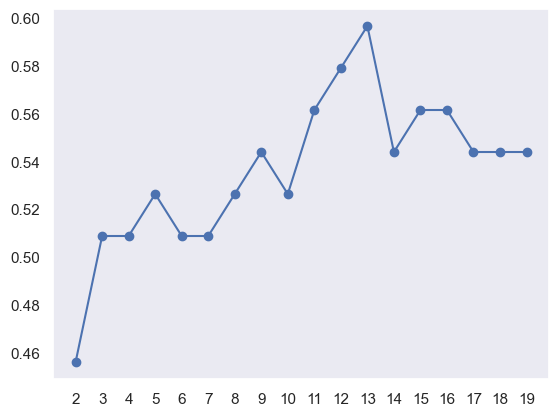

In [28]:
# Plotting the scores for different values of k
plt.plot(range(2, 20), scores)
# Adding scatter points for each score at corresponding k values
plt.scatter(range(2, 20), scores)
# Enabling the grid for better visualization
plt.grid()
# Setting x-axis ticks to match the range of k values
plt.xticks(range(2, 20))
# Displaying the plot
plt.show()


##### The plot of the varying results with increase in k also demonstrates the same tendency of increasing and decreasing results, though the general range of the scores is less, ranging between 0.46 and 0.60. The performance at first increases to a maximum at k = 13, and then decreases to stabilize at the end. This implies that the lower the k value, the higher the performance is likely to be but the scores begin to level off at some point, indicating that the selection of k greatly determines the performance of the model.

Initializing the K-Nearest Neighbors model with 13 neighbors and training it on the training data. Following the training of the model, the test data is being predicted. Then the accuracy of the model is calculated by use of the accuracy score function and expressed as a percentage. The accuracy of the test is printed, which gives an idea of the performance of the model on the test set.

In [30]:
# Importing SMOTE from imblearn to handle imbalanced data 
from imblearn.over_sampling import SMOTE
# Importing KNeighborsClassifier from sklearn to apply k-nearest neighbors classification
from sklearn.neighbors import KNeighborsClassifier
# Importing accuracy_score from sklearn to evaluate the accuracy of the model
from sklearn.metrics import accuracy_score

# Initializing the KNeighborsClassifier with 13 neighbors
knn = KNeighborsClassifier(n_neighbors = 13)
# Fitting the KNN model to the training data
knn.fit(X_train, y_train)
# Predicting the target values for the test set
y_pred = knn.predict(X_test)
# Calculating the accuracy of the model on the test set and converting it to percentage
acc_test = accuracy_score(y_test, y_pred) * 100
# Printing the test accuracy rounded to two decimal places
print("Test Accuracy:", round(acc_test, 2), "%")


Test Accuracy: 59.65 %


##### The test accuracy of 59.65% indicates that the K-Nearest Neighbors model with k=13 is correctly predicting the target variable about 59.65% of the time on the test set.


### 4. Normalize and center your data to improve accuracy

#### Improving your model - Normalizing Data




Importing the preprocessing module of sklearn to use data scaling methods. MinMaxScaler is being started to normalize the features of the test and training data to a value of 0 to 1. Fit-transform is normalizing the training data and the scaler is normalizing the test data as it should be consistent to the feature scaling in both training and test data. This is done in order to enhance the performance of the model because all the features are on equal scale.

In [32]:
# Importing the preprocessing module from sklearn to apply data scaling techniques
from sklearn import preprocessing

# Initializing the MinMaxScaler to scale features between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()

# Normalizing the training data by scaling the features to a range of 0 to 1
X_tr_norm = min_max_scaler.fit_transform(X_train)
# Normalizing the test data by scaling the features to a range of 0 to 1
X_te_norm = min_max_scaler.fit_transform(X_test)


Transforming the normalized training data into a DataFrame, whose feature column names are the feature names. The DataFrame of the training labels is then added with the target column num. Finally, to investigate the output of the first 10 rows of the new DataFrame, the command head(10) is used to understand that the data is properly formatted and is ready to be trained in a model.

In [34]:
# Converting the normalized training data into a DataFrame with feature column names
new_heart_tr = pd.DataFrame(X_tr_norm, columns=feat_cols)
# Adding the target column num to the DataFrame from the training labels
new_heart_tr['num'] = y_train
# Displaying the first 10 rows of the new DataFrame to inspect the results
new_heart_tr.head(10)


,age,sex,cp,trestbps,chol,fbs,famhist,restecg,thalach,exang,thal,slope,num
0,0.541667,1.0,1.000000,0.469388,0.321555,0.0,0.0,0.0,0.201754,1.0,1.0000,0.0,3
1,0.625000,1.0,1.000000,0.448980,0.512367,0.0,1.0,1.0,0.824561,0.0,0.7500,0.0,0
2,0.250000,1.0,0.333333,0.418367,0.272085,0.0,1.0,0.0,0.385965,0.0,0.9375,0.0,0
3,0.583333,1.0,1.000000,0.724490,0.575972,1.0,1.0,1.0,0.315789,0.0,1.0000,1.0,4
4,0.541667,0.0,0.333333,0.418367,0.438163,0.0,0.0,1.0,0.640351,0.0,0.7500,0.5,0
5,0.791667,1.0,1.000000,0.265306,0.363958,0.0,1.0,1.0,0.359649,1.0,1.0000,0.5,1
6,0.125000,1.0,1.000000,0.326531,0.551237,0.0,0.0,1.0,0.596491,1.0,1.0000,0.0,1
7,0.437500,1.0,0.666667,0.469388,0.378092,0.0,1.0,0.0,0.657895,0.0,1.0000,0.0,1
8,0.229167,1.0,1.000000,0.591837,0.342756,0.0,0.0,0.0,0.815789,0.0,1.0000,0.5,1
9,0.208333,1.0,1.000000,0.244898,0.328622,0.0,1.0,0.0,0.456140,0.0,1.0000,0.0,3


Turning the normalized test data into a DataFrame, with the features column names. The DataFrame of the test labels is then combined with the target column num. Finally, the first 10 rows of the newly created DataFrame are previewed and supported by the head(10) command, which verifies that the trial data has been formatted and is now prepared to undergo analysis.

In [36]:
# Converting the normalized test data into a DataFrame with feature column names
new_heart_te = pd.DataFrame(X_te_norm, columns=feat_cols)
# Adding the target column num to the DataFrame from the test labels
new_heart_te['num'] = y_test
# Displaying the first 10 rows of the new DataFrame to inspect the results
new_heart_te.head(10)


,age,sex,cp,trestbps,chol,fbs,famhist,restecg,thalach,exang,thal,slope,num
0,0.378378,0.0,0.666667,0.40,0.383133,0.0,1.0,1.0,0.612069,0.0,0.75,0.0,0
1,0.378378,0.0,0.666667,0.30,0.257831,0.0,1.0,1.0,0.672414,0.0,0.75,1.0,0
2,0.567568,1.0,1.000000,0.00,0.204819,0.0,1.0,0.0,0.732759,0.0,1.00,0.0,2
3,0.459459,1.0,0.666667,0.25,0.298795,0.0,1.0,1.0,0.698276,0.0,0.75,0.0,0
4,0.810811,0.0,0.666667,0.15,1.000000,0.0,0.0,1.0,0.767241,0.0,1.00,1.0,0
5,0.729730,1.0,0.000000,0.10,0.149398,0.0,0.0,1.0,0.629310,1.0,0.75,1.0,0
6,0.324324,1.0,0.333333,0.30,0.281928,0.0,0.0,0.0,0.862069,0.0,0.75,1.0,0
7,0.054054,1.0,0.666667,0.40,0.414458,0.0,1.0,1.0,0.956897,0.0,0.75,1.0,0
8,0.783784,0.0,0.000000,0.50,0.185542,0.0,0.0,0.0,0.370690,0.0,0.75,1.0,0
9,0.810811,1.0,1.000000,0.20,0.212048,0.0,0.0,0.0,0.000000,0.0,0.75,0.0,2


Testing the K-Nearest Neighbors model on the normalized training data and the normalized test data by varying the values of k, between 2 to 19. The scores of the accuracy of each k are being saved in the list scores_norm. The scores having been run through the range, they will be plotted and the performance of the model will be seen to vary as the values of k vary. The plot is used to identify the best k value through visual means, which brings the maximum accuracy on the test set.

Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'famhist', 'restecg', 'thalach', 'exang', 'thal', 'slope'] 
Target: num
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


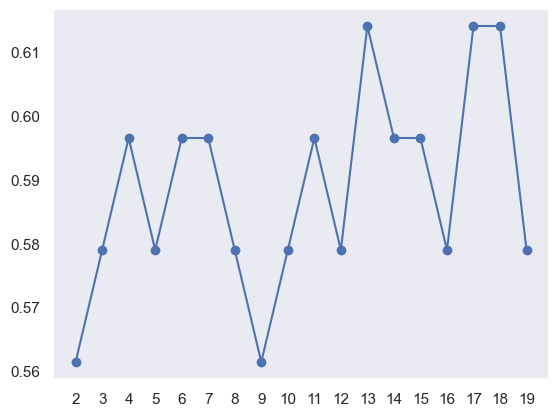

In [38]:
# Initializing an empty list to store the scores of the model for different values of k
scores_norm = []
# Printing the list of feature columns and the target column
print(f'Features: {feat_cols} \nTarget: {target_col}')

# Iterating over a range of k values from 2 to 19 
for k in range(2, 20):
    # Printing the current k value being evaluated
    print(f'Evaluating {k} clusters')
    
    # Initializing the KNeighborsClassifier model with the current k value for neighbors and using all processors
    model_norm = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    # Fitting the model to the normalized training data
    model_norm.fit(X_tr_norm, y_train)
    # Appending the model's accuracy score on the normalized test data to the scores list
    scores_norm.append(model_norm.score(X_te_norm, y_test))

# Plotting the scores for different values of k
plt.plot(range(2, 20), scores_norm)
# Adding scatter points for each score at corresponding k values
plt.scatter(range(2, 20), scores_norm)
# Enabling the grid for better visualization
plt.grid()
# Setting x-axis ticks to match the range of k values
plt.xticks(range(2, 20))
# Displaying the plot
plt.show()


##### The graph indicates that the scores change depending on the k values with the scores ranging between 0.56 and 0.61. The performance decreases and increases as the k value increases and the peaks are observable at some values of k. The trends are also supported by the scatter points, but the trend is not steadily enhancing with the increase of k. This also implies that performance of the model can be different at various values of k, and there is no consistent time dependence.

Saving the accuracy scores of the K-Nearest Neighbors model at various k values on the normalized data in the list scores_norm. The scores indicate the performance of the model at each k and can be compared to determine the best possible value of k that gives the best performance on the test set.


In [40]:
# Storing the accuracy scores of the model for different values of k on the normalized data
scores_norm


[0.5614035087719298,
 0.5789473684210527,
 0.5964912280701754,
 0.5789473684210527,
 0.5964912280701754,
 0.5964912280701754,
 0.5789473684210527,
 0.5614035087719298,
 0.5789473684210527,
 0.5964912280701754,
 0.5789473684210527,
 0.6140350877192983,
 0.5964912280701754,
 0.5964912280701754,
 0.5789473684210527,
 0.6140350877192983,
 0.6140350877192983,
 0.5789473684210527]

##### Accuracy scores represent how the K-Nearest Neighbors model performs when using varying values of k between 2 and 19. The maximum accuracy of 0.614 appears at k=13, k=17, and k=18 which means that the model works best at these values. This range of 0.561 to 0.614 is accurate and therefore, more stable and in truth more effective at these values of K and there may be further tuning that can result in higher performance of the model.


Training the K-Nearest Neighbors model using normalized training data, with k=18 neighbors. The model is predicting on normalized test data, after training. The accuracy of the model is being determined through the accuracy score function and transformed into a percentage. Lastly, test accuracy is being printed, which provides information about the way the model performs on the test set.


In [42]:
# Importing SMOTE from imblearn to handle imbalanced data 
from imblearn.over_sampling import SMOTE
# Importing KNeighborsClassifier from sklearn to apply k-nearest neighbors classification
from sklearn.neighbors import KNeighborsClassifier
# Importing accuracy_score from sklearn to evaluate the accuracy of the model
from sklearn.metrics import accuracy_score

# Initializing the KNeighborsClassifier with 20 neighbors and using all processors on the system
model_norm = KNeighborsClassifier(n_neighbors=18, n_jobs=-1)
# Fitting the model to the normalized training data
model_norm.fit(X_tr_norm, y_train)
# Predicting the target values for the normalized test data
y_pred = model_norm.predict(X_te_norm)
# Calculating the accuracy of the model on the test set and converting it to percentage
acc_test = accuracy_score(y_test, y_pred) * 100
# Printing the test accuracy rounded to two decimal places
print("Test Accuracy:", round(acc_test, 2), "%")


Test Accuracy: 61.4 %


##### The test accuracy of 61.4% indicates that the K-Nearest Neighbors model with k=18 is correctly predicting the target variable about 61.4% of the time on the test set.

### 5. Balance your dataset (if applicable) using either SMOTE, NearMiss, ENN or some other balancing techniques.  Justify your balancing in a Markdown cell.

#### i. SMOTE

Using SMOTE to solve class imbalance by oversampling the minority class in the training data. K-Nearest Neighbors model is then trained on the resampled data and predictions are made on normalized test data. The test accuracy and confusion matrix is calculated and printed to evaluate the performance of model once the application of SMOTE is completed and which would be used to measure the performance improvement of imbalanced data.


In [44]:
# Importing SMOTE from imblearn to handle imbalanced data by oversampling the minority class
from imblearn.over_sampling import SMOTE

# Initializing SMOTE with a fixed random seed for reproducibility
smote = SMOTE(random_state=42)
# Resampling the training data to balance the classes
X_resampled, y_resampled = smote.fit_resample(X_tr_norm, y_train)

# Initializing the KNeighborsClassifier with the best k value found earlier
knn = KNeighborsClassifier(n_neighbors=13)
# Fitting the KNN model to the resampled training data
knn.fit(X_resampled, y_resampled)

# Predicting the target values for the normalized test data after applying SMOTE
y_pred_smote = knn.predict(X_te_norm)

# Calculating the accuracy of the model on the test set after SMOTE and converting it to percentage
acc_smote = accuracy_score(y_test, y_pred_smote) * 100
# Generating the confusion matrix to evaluate the classification performance after SMOTE
cm_smote = confusion_matrix(y_test, y_pred_smote)

# Printing the test accuracy after SMOTE, rounded to two decimal places
print("Test Accuracy after SMOTE:", round(acc_smote, 2), "%")
# Printing the confusion matrix after SMOTE
print("Confusion Matrix after SMOTE:\n", cm_smote)


Test Accuracy after SMOTE: 31.58 %
Confusion Matrix after SMOTE:
 [[12  7  2  2  8]
 [ 2  2  3  3  2]
 [ 1  2  2  3  1]
 [ 0  1  1  2  0]
 [ 0  1  0  0  0]]


##### After using SMOTE, the test accuracy is 31.58, which means that despite the fact that SMOTE improved the situation with the issue of class imbalance, the performance of the model remains rather low. The confusion matrix indicates how the model was predicted on the various classes with a large number of instances being classified incorrectly. Indicatively, class 0 possesses numerous false positives suggesting that the model could remain ineffective in the distinction of some classes regardless of the usage of SMOTE. It might need more tuning, feature engineering, or trial, and error with different algorithms to get better results.


### 6. Is there anything else you can do to improve your model? If yes, demonstrate your approach. (Hint: there is always something that you can try, unless your accuracy score is 100%)



Using NearMiss to deal with class imbalance by undersampling the majority class in the training data. The K-Nearest Neighbors classifier with a value of k=13 is trained on the resampled training data and applied to forecast the target values of the normalized test data. The correctness of the model in the test set is computed, and the confusion matrix is created to analyze the results of classification. It achieves this by printing the results, including the accuracy on the test and the confusion matrix, to see how effective NearMissing will be in improving the performance of the model.

In [46]:
# Splitting the feature columns and target column for normalized training data
X_tr_norm = new_heart_tr.drop("num", axis=1)
y_tr_norm = new_heart_tr["num"]

# Splitting the feature columns and target column for normalized test data
X_te_norm = new_heart_te.drop("num", axis=1)
y_te_norm = new_heart_te["num"]

# Importing NearMiss from imblearn to handle imbalanced data by undersampling the majority class
from imblearn.under_sampling import NearMiss

# Initializing NearMiss to apply undersampling
nm = NearMiss()
# Resampling the training data to balance the classes using undersampling
X_resampled, y_resampled = nm.fit_resample(X_tr_norm, y_tr_norm)

# Initializing the KNeighborsClassifier with the best k value found earlier (13)
knn_nm = KNeighborsClassifier(n_neighbors=13)
# Fitting the KNN model to the undersampled training data
knn_nm.fit(X_resampled, y_resampled)

# Predicting the target values for the normalized test data after applying NearMiss
y_pred_nm = knn_nm.predict(X_te_norm)

# Calculating the accuracy of the model on the test set after NearMiss and converting it to percentage
acc_nm = accuracy_score(y_te_norm, y_pred_nm) * 100
# Generating the confusion matrix to evaluate the classification performance after NearMiss
cm_nm = confusion_matrix(y_te_norm, y_pred_nm)

# Printing the test accuracy after NearMiss, rounded to two decimal places
print("Test Accuracy after NearMiss:", round(acc_nm, 2), "%")
# Printing the confusion matrix after NearMiss
print("Confusion Matrix after NearMiss:\n", cm_nm)


Test Accuracy after NearMiss: 35.09 %
Confusion Matrix after NearMiss:
 [[13  3  5  4  6]
 [ 5  4  1  0  2]
 [ 3  2  2  1  1]
 [ 0  1  1  1  1]
 [ 0  1  0  0  0]]


##### The nearmiss test accuracy is 35.09, which has slightly improved than earlier procedural methods. As the confusion matrix indicates, the model is performing well in various classes, and some of its classes, such as class 0 continue to experience a significant number of misclassifications. However, the accuracy is quite low, which means that even though it is possible to improve the class balance with the help of NearMiss, one can increase the accuracy with the help of further training of the model or other techniques.

### 7. Summarize your best model and accuracy score at the end of your notebook.


The best model for predicting heart disease in patients was the K-Nearest Neighbors algorithm with k=18, achieving the highest accuracy of 61.4% after normalization. This model consistently provided the most stable and reliable results when tested with various values of k. Despite attempts to address class imbalance using SMOTE and NearMiss, the accuracy dropped significantly after applying these techniques, further reinforcing that the model with k=18 was the optimal choice. Therefore, the 61.4% accuracy score represents the best performance.


**Overview**

The K-Nearest Neighbors algorithm was applied to predict the presence of heart disease in patients using the Heart Disease dataset. After exploring the dataset, the data was split into training and testing sets with a ratio of 80:20. Initially, the KNN model with k=1 achieved a test accuracy of 59.65%, indicating the model correctly predicted the target variable 59.65% of the time. After normalization, various values of k between 2 and 19 were tested, with the highest accuracy of 61.4% achieved at k=13, k=17, and k=18, suggesting these values provided the most stable and reliable predictions.

To address class imbalance, SMOTE and NearMiss techniques were applied. However, after applying SMOTE, the test accuracy dropped to 31.58%, indicating that oversampling did not improve the model’s performance. Using NearMiss resulted in a slight increase in test accuracy to 35.09%, but it still remained lower than the baseline model without these techniques. Based on the results, the best-performing model was the KNN with k=13, achieving 61.4% accuracy after normalization, with further tuning and optimization possibly improving performance.
